In [2]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


raw = pd.read_csv("HR_song.csv")
data = raw.copy()

data.shape



(1470, 35)

In [4]:
data.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data["Attrition"].value_counts()


Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [7]:
data.groupby("Attrition")["Age"].describe()


,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1233.0,37.561233,8.88836,18.0,31.0,36.0,43.0,60.0
Yes,237.0,33.607595,9.68935,18.0,28.0,32.0,39.0,58.0


🧠 이 단계에서의 질문 (지금 답 안 해도 됨)

이직자 평균 나이가 더 낮은가? --> 낮다

분산이 큰가?

극단값이 있는가?

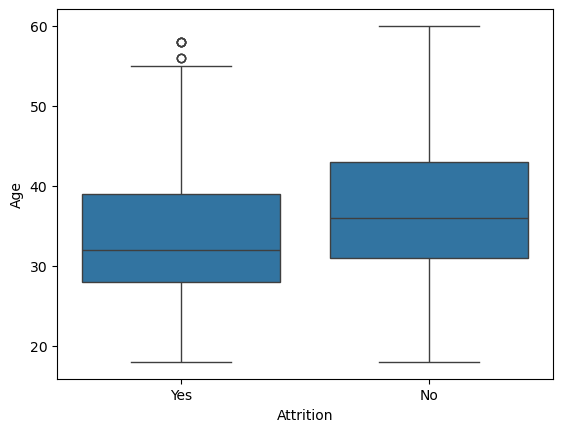

In [8]:
sns.boxplot(x="Attrition", y="Age", data=data)
plt.show()


In [9]:
pd.crosstab(data["Gender"], data["Attrition"], normalize="index")


Attrition,No,Yes
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068


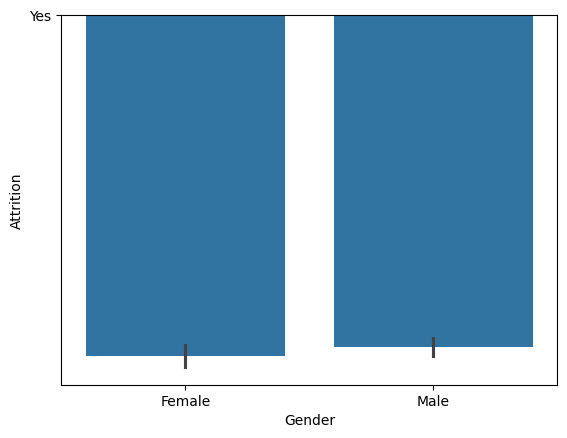

In [10]:
sns.barplot(x="Gender", y="Attrition", data=data)
plt.show()


In [11]:
pd.crosstab(data["MaritalStatus"], data["Attrition"], normalize="index")


Attrition,No,Yes
MaritalStatus,,
Divorced,0.899083,0.100917
Married,0.875186,0.124814
Single,0.744681,0.255319


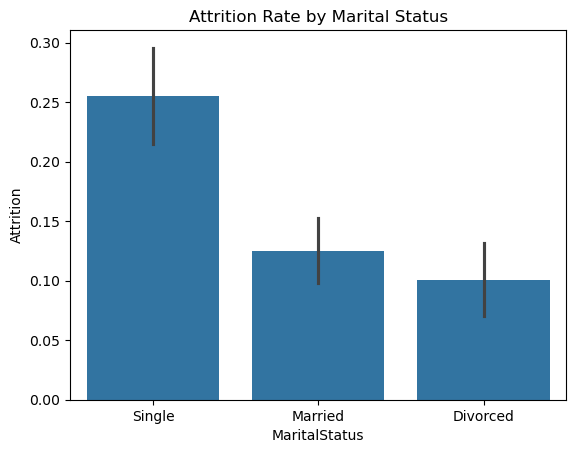

In [12]:
sns.barplot(
    data=data,
    x="MaritalStatus",
    y=(data["Attrition"] == "Yes").astype(int)
)
plt.title("Attrition Rate by Marital Status")
plt.show()


In [13]:
data.groupby("Attrition")["DistanceFromHome"].describe()


,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1233.0,8.915653,8.012633,1.0,2.0,7.0,13.0,29.0
Yes,237.0,10.632911,8.452525,1.0,3.0,9.0,17.0,29.0


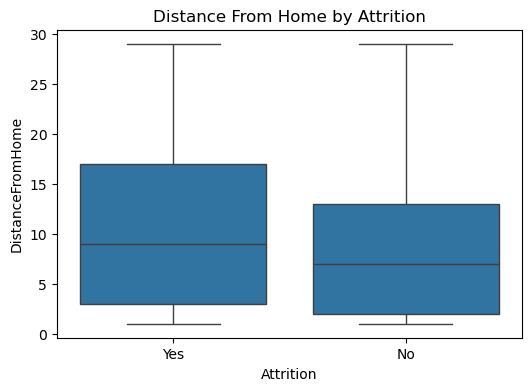

In [14]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Attrition", y="DistanceFromHome", data=data)
plt.title("Distance From Home by Attrition")
plt.show()


Boxplot 결과, 이직한 직원은 재직 직원에 비해
전반적으로 집과 회사 간 거리가 더 먼 분포를 보였다.
이는 DistanceFromHome이 이직과 관련된 중요한 변수임을 시사한다.

*결론 (보고서용)
이직한 직원(Yes)은 재직 직원(No)에 비해
집과 회사 간 거리의 중앙값과 분포가 전반적으로 더 크다.
DistanceFromHome은 이직과 의미 있는 관련성을 보인다.

In [15]:
data["EducationField"].value_counts()


EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [16]:
pd.crosstab(
    data["EducationField"],
    data["Attrition"],
    normalize="index"
)


Attrition,No,Yes
EducationField,,
Human Resources,0.740741,0.259259
Life Sciences,0.853135,0.146865
Marketing,0.779874,0.220126
Medical,0.864224,0.135776
Other,0.865854,0.134146
Technical Degree,0.757576,0.242424


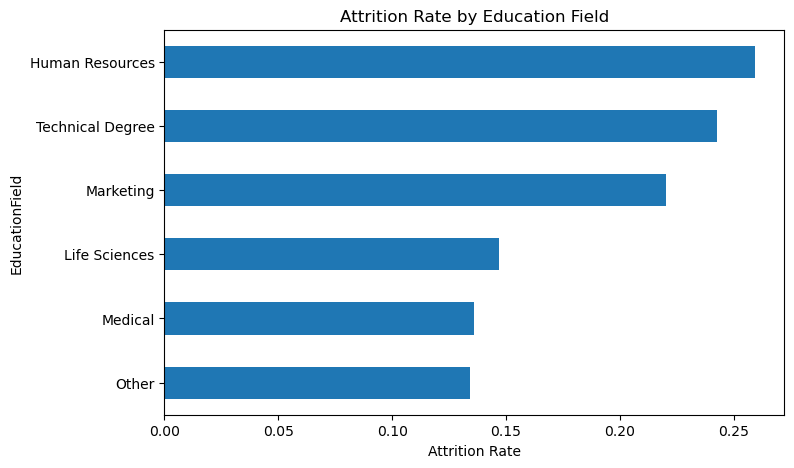

In [17]:
edu_attr = pd.crosstab(
    data["EducationField"],
    data["Attrition"],
    normalize="index"
)

edu_attr["Yes"].sort_values().plot(
    kind="barh",
    figsize=(8,5),
    title="Attrition Rate by Education Field"
)

plt.xlabel("Attrition Rate")
plt.show()


EducationField에 따른 이직률을 분석한 결과,
**Human Resources 전공에서 가장 높은 이직률(약 26%)**이 관찰되었으며,
Medical 및 Life Sciences 전공에서는 상대적으로 낮은 이직률을 보였다.

“전공별로 이직률 차이가 존재하며, 특히 Human Resources 전공에서 이직 성향이 가장 높게 나타났습니다.”


| Education 값 | 의미            |
| ----------- | ------------- |
| 1           | Below College |
| 2           | College       |
| 3           | Bachelor      |
| 4           | Master        |
| 5           | Doctor        |

In [18]:
pd.crosstab(
    data["Education"],
    data["Attrition"],
    normalize="index"
)


Attrition,No,Yes
Education,,
1,0.817647,0.182353
2,0.843972,0.156028
3,0.826923,0.173077
4,0.854271,0.145729
5,0.895833,0.104167


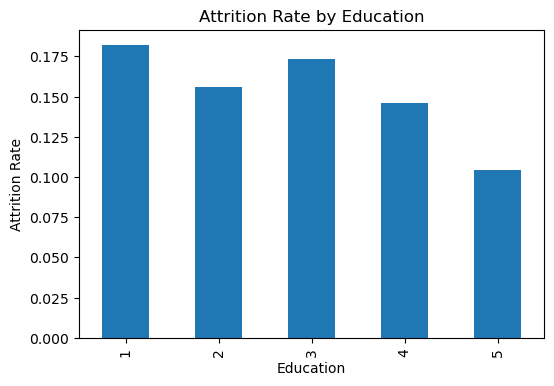

In [19]:
(
    pd.crosstab(data["Education"], data["Attrition"], normalize="index")["Yes"]
    .plot(kind="bar", figsize=(6,4), title="Attrition Rate by Education")
)
plt.ylabel("Attrition Rate")
plt.show()


* 교육 수준 분석의 결론

교육 수준(Education)에 따른 이직률을 분석한 결과,
교육 수준이 높아질수록 이직률이 완만하게 감소하는 경향을 보였으나,
전공(EducationField)에 비해 영향력은 상대적으로 제한적이었다.

📊 Personal Profile 분석 결과
(누가 회사를 떠나는가?)

분석 목적

개인의 생활·배경 요인이 이직(Attrition)에 미치는 영향 분석

“어떤 직원이 더 많이 퇴사하는가?”에 집중


분석 변수

Age (나이)

Gender (성별)

MaritalStatus (결혼 상태)

Education (교육 수준)

EducationField (전공)

DistanceFromHome (집과 회사 거리)

✅ 핵심 결과 요약
🔴 이직에 큰 영향을 주는 요인

나이: 이직자는 평균적으로 더 젊음

결혼 상태: 미혼(Single) 직원 이직률 가장 높음

집과의 거리: 출퇴근 거리가 멀수록 이직률 증가

🟠 중간 영향

전공(EducationField):

HR, Technical 계열 → 상대적으로 이직률 높음

Medical, Life Sciences → 낮음

🟡 영향이 작은 요인

성별(Gender): 남·여 이직률 차이 크지 않음

교육 수준(Education): 이직률과의 관계 약함

🧠 결론 (한 문장 요약)

젊고, 미혼이며, 출퇴근 거리가 먼 직원일수록 이직 가능성이 높다.
개인 요인 중에서는 결혼 상태와 통근 거리가 가장 중요한 변수로 나타났다.

🎯 시사점

초기 커리어·미혼 직원 대상 유지 전략 필요

원거리 근무자에 대한 유연 근무 / 복지 정책 고려


“개인 배경 요인을 분석한 결과, 젊고 미혼이며 출퇴근 거리가 먼 직원일수록 이직률이 높았고, 성별이나 교육 수준의 영향은 상대적으로 크지 않았습니다.”


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
print(data.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Age = 나이
Attrition = 퇴직여부
BusinessTravel = 출장빈도
DailyRate = 일당
Department = 부서
DistanceFromHome = 통근거리
Education = 학력
EducationField = 전공
EmployeeCount = 직원 수
EmployeeNumber = 직원번호
RelationshipSatisfaction = 동료와의 관계 만족도
StandardHours = 표준 근로 시간
StockOptionLevel = 스톡옵션 부여 수준
TotalWorkingYears = 총 경력기간
TrainingTimesLastYear = 작년 교육훈련 횟수
WorkLifeBalance = 워라밸 (일과 삶의 균형 만족도)
YearsAtCompany = 현 직장 근속 연수
YearsInCurrentRole = 현 직무 근속 연수
YearsSinceLastPromotion = 마지막 승진 이후 경과 연수
YearsWithCurrManager = 현재 상사(사수)와 함께 일한 기간

In [ ]:
attrition_count = data['Attrition'].value_counts()
attrition_rate = data['Attrition'].value_counts(normalize=True) * 100

print("퇴직 여부")
print(attrition_count)
print("\n퇴직 여부 비율")
print(attrition_rate)

퇴직 여부
Attrition
No     1233
Yes     237
Name: count, dtype: int64

퇴직 여부 비율
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


### '직무'

In [ ]:
attrition_job = data.groupby('JobRole')['Attrition'].value_counts(normalize=True) * 100

print(attrition_job)

Attrition                         No        Yes
JobRole                                        
Healthcare Representative  93.129771   6.870229
Human Resources            76.923077  23.076923
Laboratory Technician      76.061776  23.938224
Manager                    95.098039   4.901961
Manufacturing Director     93.103448   6.896552
Research Director          97.500000   2.500000
Research Scientist         83.904110  16.095890
Sales Executive            82.515337  17.484663
Sales Representative       60.240964  39.759036


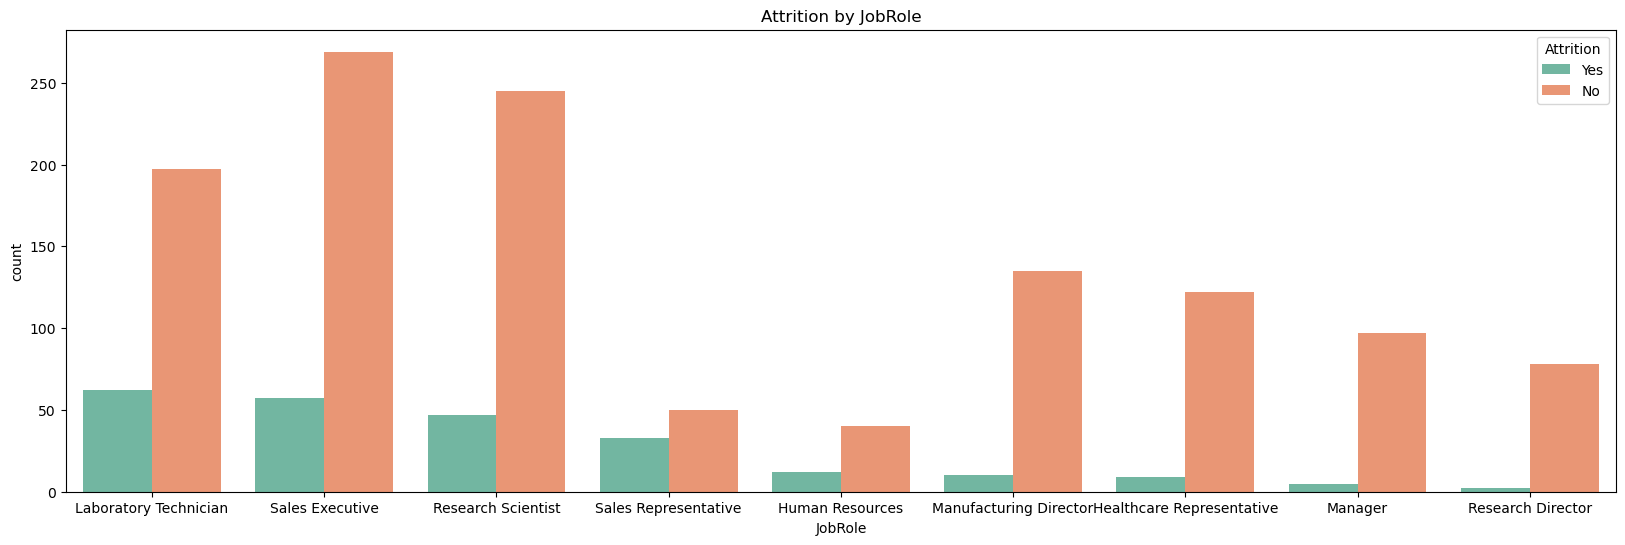

In [ ]:
job_attrition_order = data[data['Attrition'] == 'Yes']['JobRole'].value_counts().index

plt.figure(figsize=(20, 6))
sns.countplot(x='JobRole', hue='Attrition', data=data, palette='Set2', order=job_attrition_order)
plt.title('Attrition by JobRole')
plt.show()

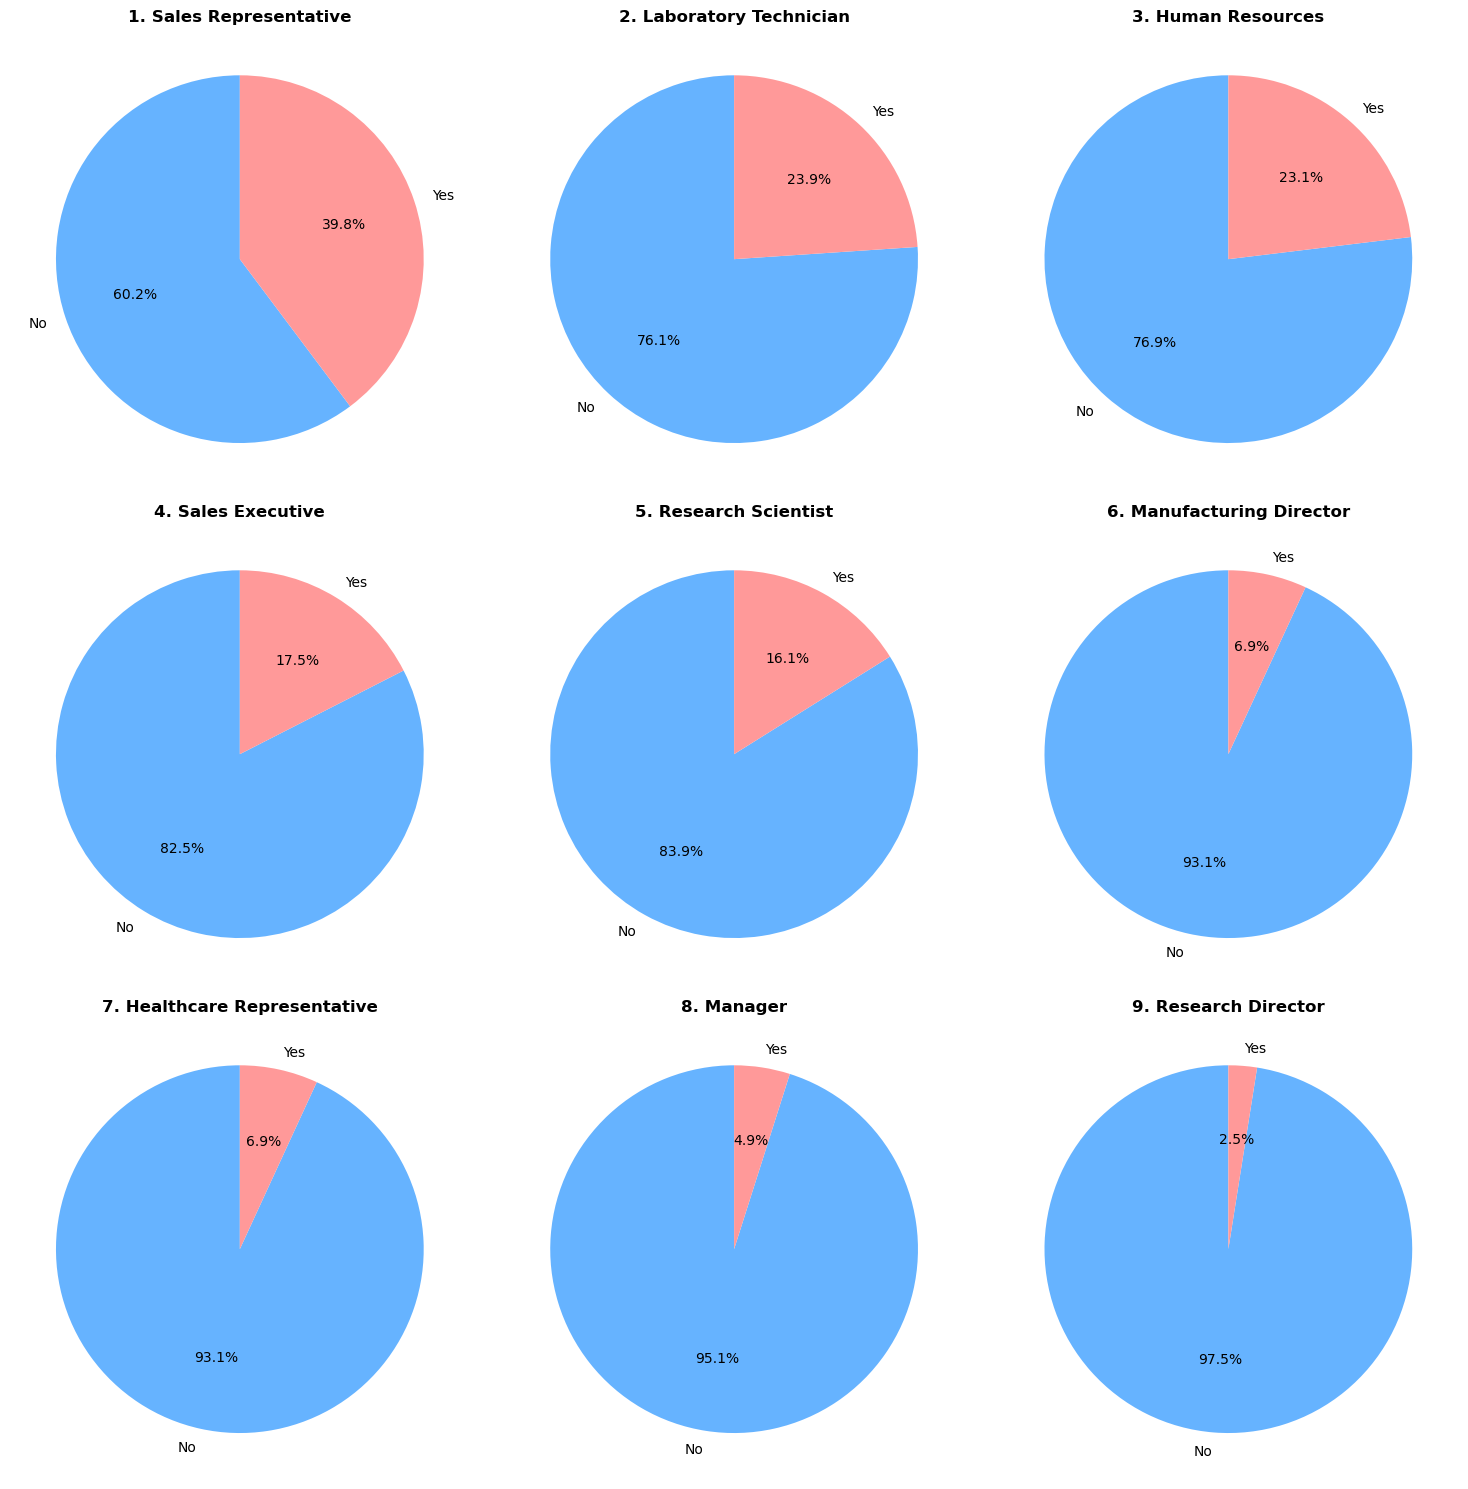

In [ ]:
# 1. 직무별 퇴직률 계산 및 정렬
job_attrition_rates = data.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
#JobRole(직무)끼리 묶어서 Attrition(퇴직여부)의 갯수를 normalize=True 비율로 계산한다. fillna(0) = 만약 퇴직자가 0명인 직무가 있다면 에러 대신 0을 채워넣는다.
sorted_job_roles = job_attrition_rates.sort_values(by='Yes', ascending=False).index
#sort_values(by='Yes', ascending=False) - Attrition 항목에서 'Yes'를 기준으로 내림차순(큰것부터) 정렬
#.index = 계산한 값은 버리고 계산된 값의 행(직무명)만 순서대로 가져온다.


# 2. 그래프 레이아웃 설정 (3행 3열)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
#fig = 전체 도화지 / axes = 그 안에 들어갈 각각의 칸(9개)
#plt.subplots(3, 3) = 가로3칸 세로3칸의 표를 만든다.
axes = axes.flatten()
#반복문을 사용하기 위해 2차원으로 되어있는 axes를 1차원 리스트로 쭉 펴준다.
 

# 3. 정렬된 순서(sorted_job_roles)대로 원형 그래프 생성
for i, role in enumerate(sorted_job_roles):
    # axes를 9칸으로 나눠놨기 때문에 각 값에 순서를 매기고 값을 순서대로 그래프로 만들기 위해 for i 를 사용
    # enumerate() = 반복계산하여 나온 값을 (순서,내용물) 세트로 묶어달라. ex) (0, 'Sales'), (1, 'Research'), (2, 'HR') ~~
    # for i, role in = 위에서 enumerate로 나온 값을 i(순서(인덱스)) 와 role(직무(값)) 에 나눠 담는다.
    # ex) i = (0, 1, 2, ~~) / role = ('Sales', 'Reserch', 'HR'~)

    role_data = data[data['JobRole'] == role]['Attrition'].value_counts()
    # data['JobRole'] == role - 전체 데이터의 'JobRole'(직무) 칸 중에서 지금 반복문으로 반복하고 있는 '직무'(role)와 똑같은 행이 어딘지 찾는다.

    # 원형 그래프 시각화 (No와 Yes의 순서를 고정하기 위해 index로 정렬 추천)
    role_data = role_data.reindex(['No', 'Yes'], fill_value=0) 
    #퇴직자(yes)가 0명인 경우가 있을 수 있으니 순서를 'No','Yes'로 변경하여 값을 구한다.
    
    axes[i].pie(                    #[i]번째 칸에 pie(원형) 그래프를 그려라.
        role_data,                  #숫자(밸류)
        labels=role_data.index,     #'Yes','No'라는 이름의 인덱스
        autopct='%1.1f%%',          #그래프 안에 소수점 첫째 자리까지 퍼센트를 표시하라
        startangle=90,              #원의 시작점을 12시방향으로 동일하게 맞춰라.
        colors=['#66b3ff', '#ff9999'], # No: 하늘색, Yes: 분홍색
    )
    axes[i].set_title(f'{i+1}. {role}', fontsize=12, fontweight='bold')
    # i번에 해당하는 제목에 i+1을 한 숫자를 넣어라.


plt.tight_layout()
plt.show()

Sales Executive = 영업관리
Laboratory Technician = 실험실 기술직
Human Resources = 인사담당자
Sales Representative = 영업사원
Research Scientist = 연구원
Manufacturing Director = 제조/생산 책임자
Healthcare Representative = 의료영업 담당자
Manager = 매니저(부서장)
Research Director = 연구소장

### '출장 빈도'

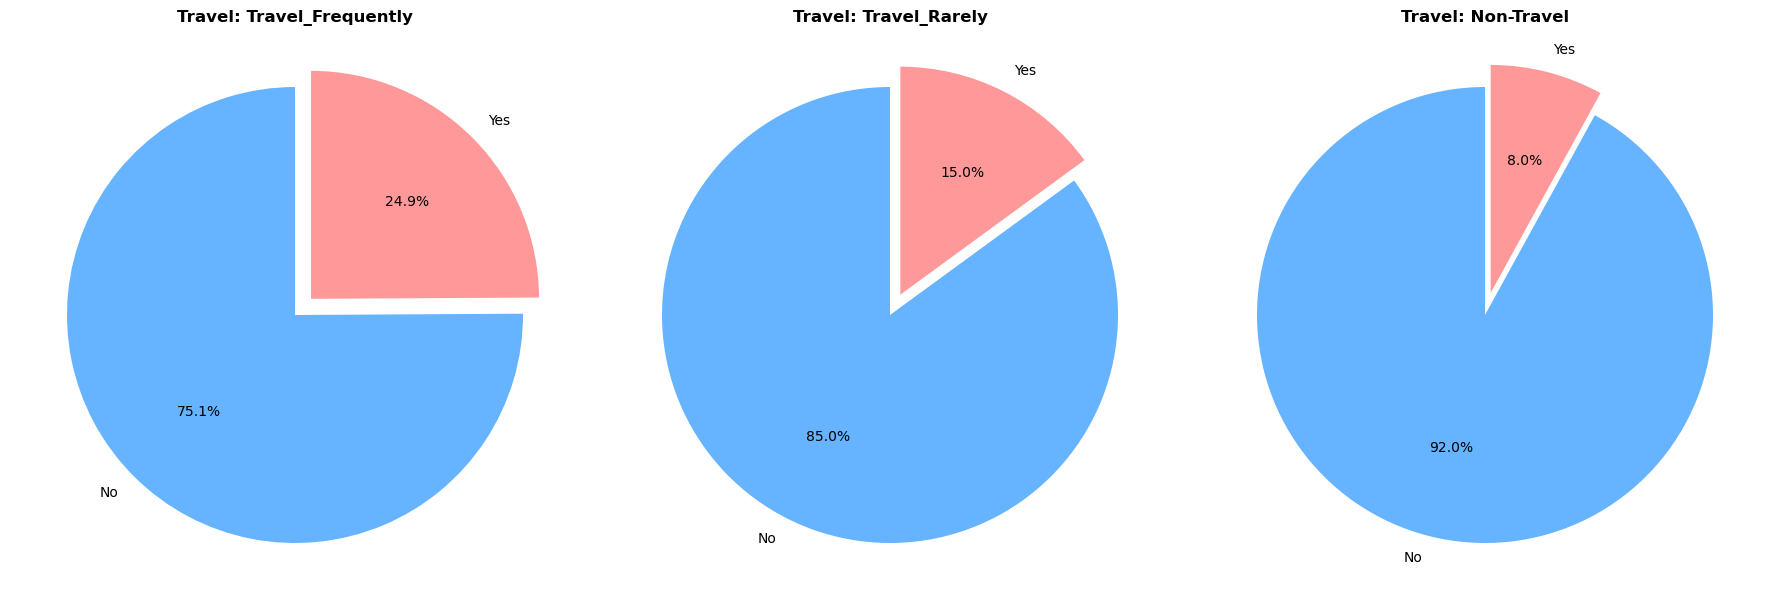

In [ ]:
# 1. 출장 빈도별 퇴직률 계산 및 정렬
travel_attrition_rates = data.groupby('BusinessTravel')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
sorted_travel = travel_attrition_rates.sort_values(by='Yes', ascending=False).index

# 2. 그래프 레이아웃 설정 (1행 3열)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes = axes.flatten()

# 3. 각 출장 빈도별 원형 그래프 생성
for i, travel in enumerate(sorted_travel):
    travel_data = data[data['BusinessTravel'] == travel]['Attrition'].value_counts()
    travel_data = travel_data.reindex(['No', 'Yes'], fill_value=0)
    
    axes[i].pie(
        travel_data, 
        labels=travel_data.index, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=['#66b3ff', '#ff9999'],
        explode=[0, 0.1]
    )
    axes[i].set_title(f'Travel: {travel}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### 출장 빈도에 따른 퇴직율
**출장 빈도가 높을수록 퇴직율이 높으며, 출장 빈도가 높은 사람과 출장을 가지 않는 사람보다 퇴사율이 3배이상 높다.**

### '야근 여부'

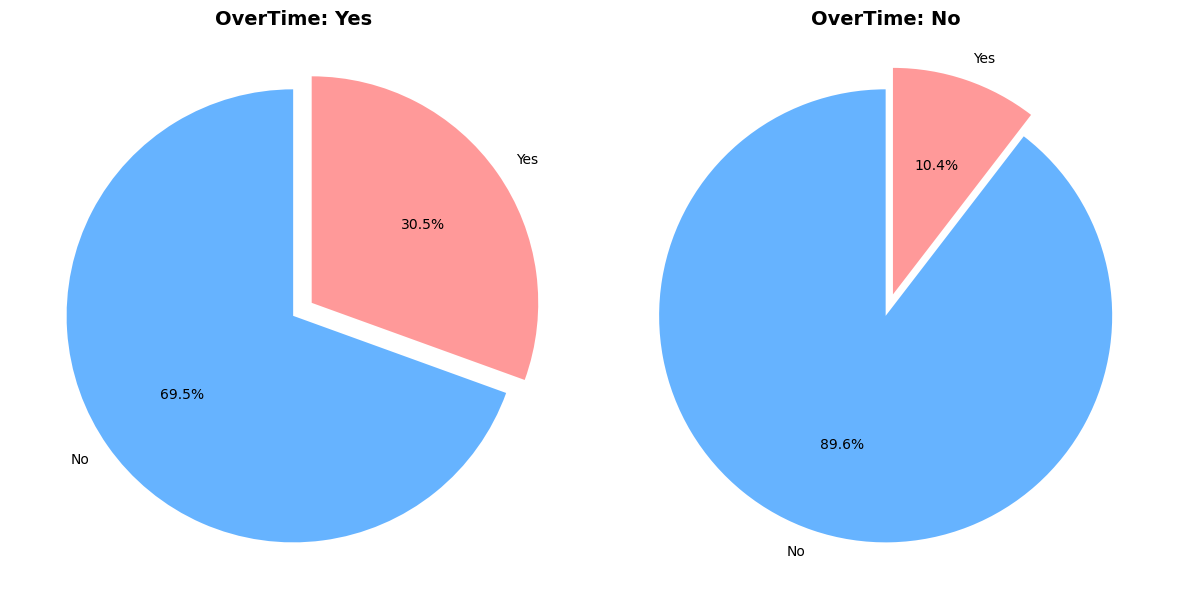

In [ ]:
# 1. 야근 여부별 퇴직률 계산 및 정렬
# OverTime(야근 여부)에 따른 Attrition(퇴직 여부) 비율 계산
ot_attrition_rates = data.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
sorted_ot = ot_attrition_rates.sort_values(by='Yes', ascending=False).index

# 2. 그래프 레이아웃 설정 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()

# 3. 야근 여부별 원형 그래프 생성
for i, ot_status in enumerate(sorted_ot):
    ot_data = data[data['OverTime'] == ot_status]['Attrition'].value_counts()
    ot_data = ot_data.reindex(['No', 'Yes'], fill_value=0)
    
    axes[i].pie(
        ot_data, 
        labels=ot_data.index, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=['#66b3ff', '#ff9999'],
        explode=[0, 0.1]
    )
    axes[i].set_title(f'OverTime: {ot_status}', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

#### 야근여부에 따른 퇴직율
**야근을 하는 사람이 야근을 하지 않는사람보다 퇴직율이 약 3배정도 높다.**

### '환경 만족도'

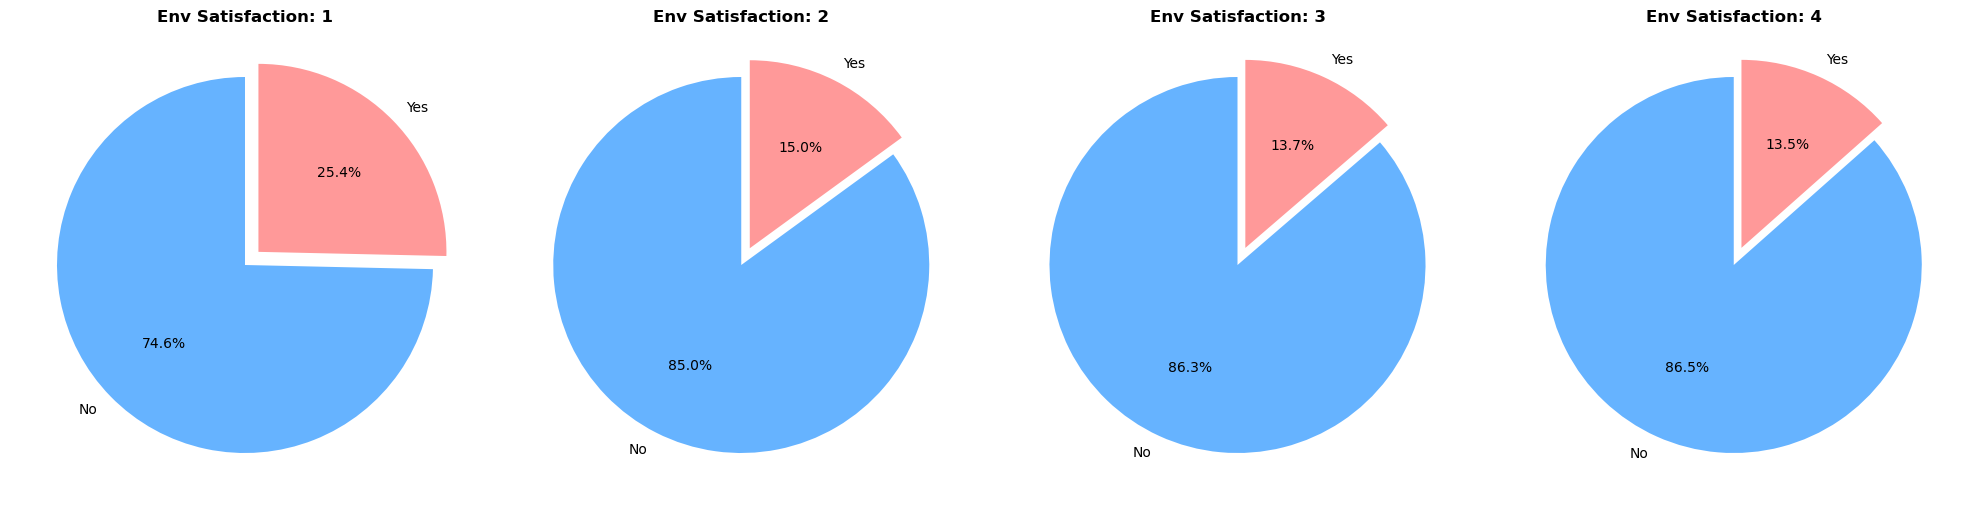

In [ ]:
# 1. 환경 만족도별 퇴직률 계산 및 정렬 (만족도 낮은 순서대로 보거나, 퇴직률 높은 순서대로 정렬)
env_attrition_rates = data.groupby('EnvironmentSatisfaction')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
sorted_env = env_attrition_rates.sort_values(by='Yes', ascending=False).index

# 2. 그래프 레이아웃 설정 (1행 4열)
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes = axes.flatten()

# 3. 각 만족도 점수별 원형 그래프 생성
for i, level in enumerate(sorted_env):
    env_data = data[data['EnvironmentSatisfaction'] == level]['Attrition'].value_counts()
    env_data = env_data.reindex(['No', 'Yes'], fill_value=0)
    
    axes[i].pie(
        env_data, 
        labels=env_data.index, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=['#66b3ff', '#ff9999'],
        explode=[0, 0.1]
    )
    axes[i].set_title(f'Env Satisfaction: {level}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### 환경 만족도에 따른 퇴직율
**환경만족도가 높을수록 퇴직율이 낮아지긴 하지만 일정 만족도 이상부터는 눈에 띌 정도로 차이가 나지 않는다.**

## 3번 Compensation & Stisfaction (보상 및 심리적 만족)파트
돈과 마음을 다루는 파트
"돈을 적게 줘서 나가는가? 아니면 돈은 줘도 마음이 떠나서(만족도 저하로 인해) 나가는가?

3번 파트 핵심 분석 가설(Checklist)

1.급여(MonthlyIncome) 격차 : 퇴사자와 재직자 간의 월급 차이가 실제로 유의미하게 나는가?

2. 스톡옵션(StockOptionLevel) 의 힘 : 스톡 옵션이 없는 직원 (Level 0)이 퇴사율이 압도적으로 높은가?

3. 만족도(Satisfaction)의 역설 : 급여가 높아도 직무 만족도가 낮으면 퇴사하는가?

#### 이 코드는 **보상(돈)**과 **만족도(심리)**가 **퇴사(Attrition)**에 미치는 영향을 시각화해 줍니다.

C:\Users\slien\AppData\Local\Temp\ipykernel_46208\1023037003.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='MonthlyIncome', data=df_clean, palette='coolwarm')


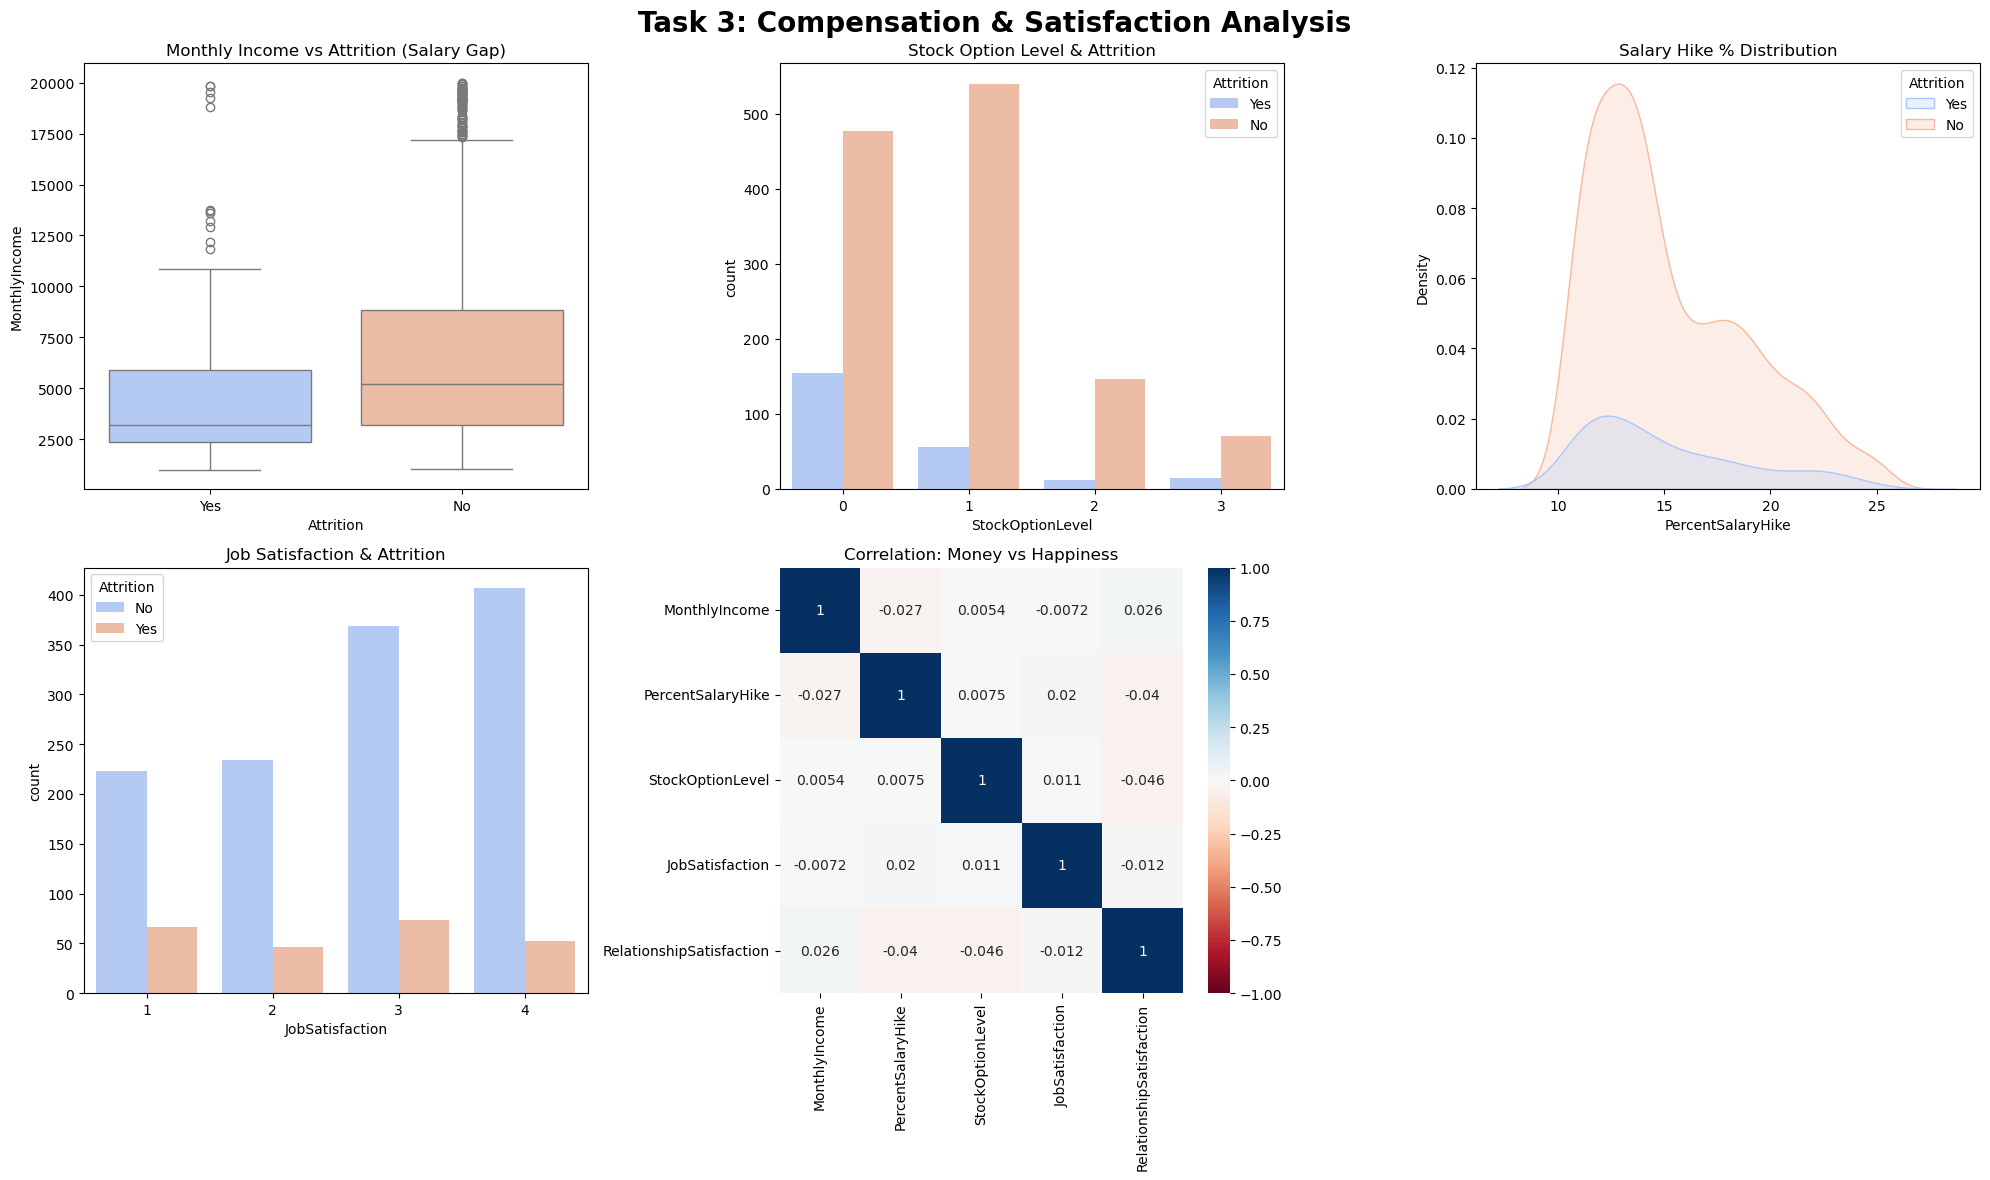

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 로드 및 전처리 (필수)
df = pd.read_csv(r'C:\Users\slien\Desktop\python_study\2026_01_19\WA_Fn-UseC_-HR-Employee-Attrition.csv')

#------------------------------
# 불필요한 상수 컬럼 제거
df_clean = df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'])

#------------------------------
# 3번 파트 담당 변수 리스트
comp_vars = [
    'MonthlyIncome',          # 월급 (가장 중요)
    'PercentSalaryHike',      # 급여 인상률
    'StockOptionLevel',       # 스톡옵션 레벨
    'JobSatisfaction',        # 직무 만족도
    'RelationshipSatisfaction'# 관계 만족도
]
#------------------------------
# 시각화 설정
plt.figure(figsize=(20, 12))
plt.suptitle("Task 3: Compensation & Satisfaction Analysis", fontsize=20, fontweight='bold')

#------------------------------
# 그래프 1: 월급(MonthlyIncome)과 퇴사(Attrition)의 관계 (Boxplot)
# 해석 포인트: 'Yes'(퇴사자)의 박스가 'No'(재직자)보다 아래에 있으면 "돈 때문에 나간다"는 뜻
plt.subplot(2, 3, 1)
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df_clean, palette='coolwarm')
plt.title('Monthly Income vs Attrition (Salary Gap)')

#------------------------------
# 그래프 2: 스톡옵션(StockOptionLevel)별 퇴사 비율 (Countplot)
# 해석 포인트: Level 0에서 'Yes' 비중이 높은지 확인하세요. (보통 스톡옵션 없으면 이탈 높음)
plt.subplot(2, 3, 2)
sns.countplot(x='StockOptionLevel', hue='Attrition', data=df_clean, palette='coolwarm')
plt.title('Stock Option Level & Attrition')

#------------------------------
# 그래프 3: 급여 인상률(PercentSalaryHike) 분포 (KDE Plot)
# 해석 포인트: 인상률이 낮은 구간에 퇴사자(Yes)가 몰려있는지 확인
plt.subplot(2, 3, 3)
sns.kdeplot(data=df_clean, x='PercentSalaryHike', hue='Attrition', fill=True, palette='coolwarm')
plt.title('Salary Hike % Distribution')

#------------------------------
# 그래프 4: 직무 만족도(JobSatisfaction)별 퇴사 현황
# 해석 포인트: 만족도 1점(Low)인 직원들의 퇴사 비율이 얼마나 높은가?
plt.subplot(2, 3, 4)
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df_clean, palette='coolwarm')
plt.title('Job Satisfaction & Attrition')

#------------------------------
# 그래프 5: 월급과 직무만족도의 상관관계 (Heatmap)
# 해석 포인트: 돈을 많이 주면 만족도가 올라가는가? (상관계수가 높으면 그렇다)
# 3번 파트 변수들끼리의 상관관계만 따로 뽑아서 봅니다.
corr_data = df_clean[comp_vars].corr()
plt.subplot(2, 3, 5)
sns.heatmap(corr_data, annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlation: Money vs Happiness')

plt.tight_layout()
plt.show()

#-------------------------------------------------------------------

1. no의 박스보다 yes가 낮게 나온 것으로 보니 돈을 나가는게 맞다는 결론

2. 스톡옵션 level에서 no이 비중이 높은 것을 확인하니

     이탈 위험이 높은 집단이 전체직원의 대다수를 차지하고 있다는 것을 확인

3. 인상률이 낮은 구간에 퇴사자(yes)가 몰려있다는 것도 확인

4. 만족도 1점인 퇴사 비율이 얼마나 높은지 확인하니 전체적으로 비슷하다는 점

5. 그렇다고 돈을 많이 주면 만족도가 올라가는지 상관계수가 높은지 확인했으나

상관계수가 높진 않아서 돈을 준다고 해서 만족도가 올라가진 않는다는 사실까지 확인

#-------------------------------------------------------------------

### 우리가 다음으로 증명하려는 가설은 "누가(JobRole), 돈을 못 받아서(MonthlyIncome), 떠나는가(Attrition)?"

C:\Users\slien\AppData\Local\Temp\ipykernel_46208\3370836540.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AttritionRate', y='JobRole', data=attrition_counts, palette='Reds_r')
C:\Users\slien\AppData\Local\Temp\ipykernel_46208\3370836540.py:46: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\slien\AppData\Local\Temp\ipykernel_46208\3370836540.py:46: UserWarning: Glyph 44553 (\N{HANGUL SYLLABLE GEUB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\slien\AppData\Local\Temp\ipykernel_46208\3370836540.py:46: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\slien\AppData\Local\Temp\ipykernel_46208\3370836540.py:46: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) D

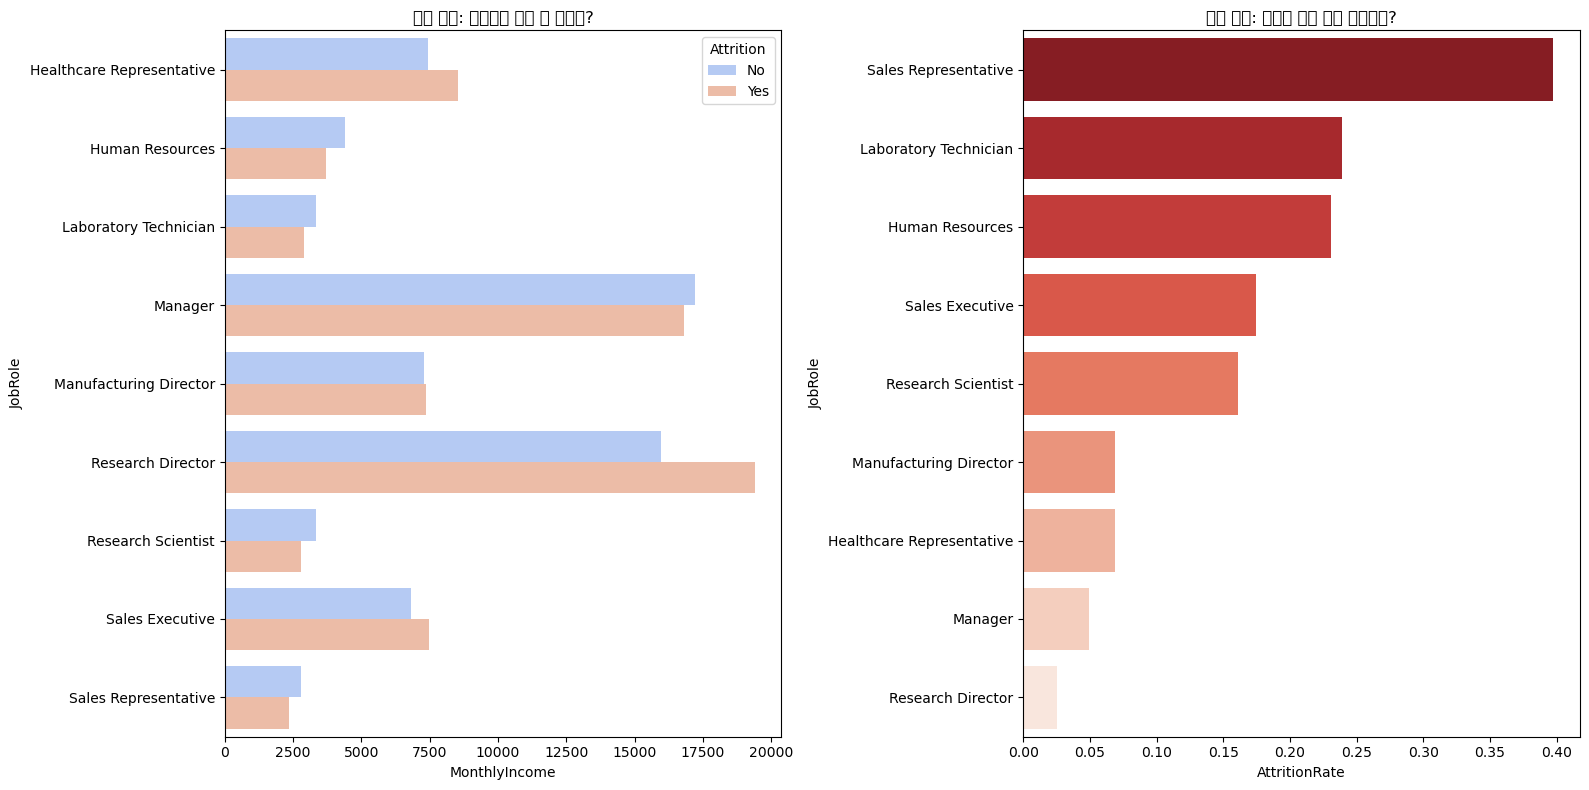

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#----------------------------
# 1. 데이터 로드


####  왼쪽: 월급 차이 그래프 / 오른쪽: 직무별 퇴사율 순위 그래프

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')


#----------------------------
# 2. 직무별 '평균 월급' 계산 (돈 문제 확인용)
# 해석: 직무(JobRole)와 퇴사여부(Attrition)로 묶어서 월급의 평균(.mean)을 구함
income_by_role = df.groupby(['JobRole', 'Attrition'])['MonthlyIncome'].mean().reset_index()


#----------------------------
# 3. 직무별 '퇴사율' 계산 (심각도 확인용)

# 3-1. 직무별/퇴사여부별 인원수 세기
attrition_counts = df.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)

# 3-2. 전체 인원수 = 퇴사자(Yes) + 재직자(No)
attrition_counts['Total'] = attrition_counts['Yes'] + attrition_counts['No']

# 3-3. 퇴사율 = 퇴사자 / 전체 인원수
attrition_counts['AttritionRate'] = attrition_counts['Yes'] / attrition_counts['Total']

# 3-4. 퇴사율 높은 순서대로 정렬
attrition_counts = attrition_counts.reset_index().sort_values('AttritionRate', ascending=False)



#----------------------------
# 4. 그래프 그리기 (시각화)
plt.figure(figsize=(16, 8))

# 왼쪽: 월급 차이 그래프
plt.subplot(1, 2, 1)
sns.barplot(x='MonthlyIncome', y='JobRole', hue='Attrition', data=income_by_role, palette='coolwarm')
plt.title('월급 차이: 퇴사자가 돈을 덜 받는가?')

# 오른쪽: 퇴사율 순위 그래프
plt.subplot(1, 2, 2)
sns.barplot(x='AttritionRate', y='JobRole', data=attrition_counts, palette='Reds_r')
plt.title('위험 직무: 어디가 제일 많이 나가는가?')

plt.tight_layout()
plt.show()

# History & Tenure (근속 연수 및 경력)

#### "언제 떠나는가?"에 집중합니다. 조직 내에서의 시간 흐름과 경력 정체(Stagnation)를 분석합니다.
#### 핵심 질문: 승진한 지 오래되었거나, 한 매니저 밑에 오래 있으면 떠나는가?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r"C:\Users\user\Desktop\0119\WA_Fn-UseC_-HR-Employee-Attrition.csv")

## 1. 퇴사 여부에 따른 총 경력(TotalWorkingYears) 분포 비교

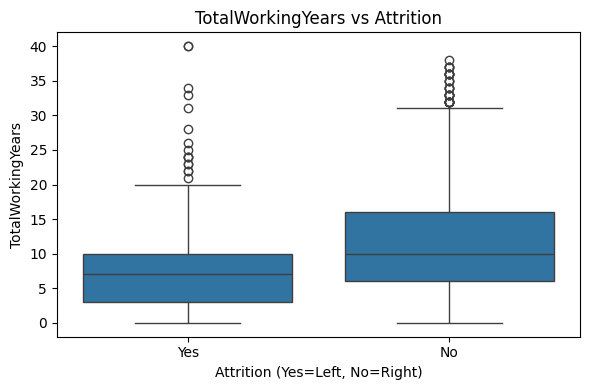

           count       mean  median
Attrition                          
No          1233  11.862936    10.0
Yes          237   8.244726     7.0


In [ ]:
# 1) 퇴사여부랑 총경력(TotalWorkingYears) 두 칸만 뽑고, 빈칸 있는 줄은 버린다.
df_tw = df[["Attrition", "TotalWorkingYears"]].dropna()

# 2) (분석용) 이직 여부를 0/1로 바꿔서 '이직률' 계산 가능하게 만들기
df_tw["AttritionFlag"] = (df_tw["Attrition"] == "Yes").astype(int)

# 3) (분석) 이직/잔류 그룹별 핵심 숫자 요약 만들기
summary = df_tw.groupby("Attrition")["TotalWorkingYears"].agg(count="count", mean="mean", median="median")

# 4) (시각화) 이직(Yes/No)별 총 경력 분포를 한 장으로 비교 (박스플롯)
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_tw, x="Attrition", y="TotalWorkingYears")
plt.title("TotalWorkingYears vs Attrition")
plt.xlabel("Attrition (Yes=Left, No=Right)")
plt.ylabel("TotalWorkingYears")
plt.tight_layout()
plt.show()

print(summary)


### **결론**
#### - 퇴사자(Yes)는 잔류자(No)보다 총 경력(TotalWorkingYears)이 전반적으로 더 짧은 분포를 보였습니다.
#### - 요약 통계에서도 중앙값이 Yes 7년, No 10년, 평균도 Yes 8.24년, No 11.86년으로 차이가 확인됩니다.
#### -> 따라서 총 경력이 짧은 집단에서 퇴사(Attrition) 비율이 상대적으로 높을 가능성이 있습니다.

## 2. 퇴사 여부에 따른 이전 회사 수(NumCompaniesWorked)의 관계성

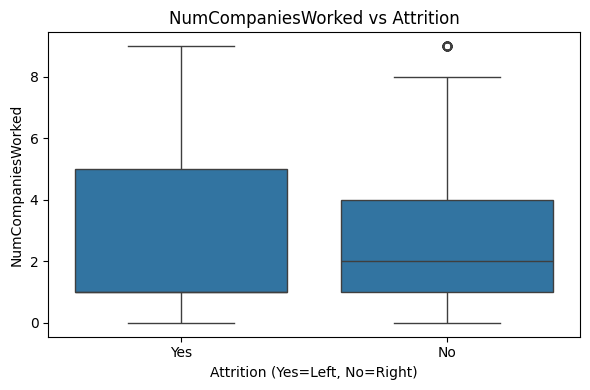

           count      mean  median
Attrition                         
No          1233  2.645580     2.0
Yes          237  2.940928     1.0


In [ ]:
# 1) 퇴사 여부와 이전 회사 수(NumCompaniesWorked) 두 칸만 뽑고, 빈칸 있는 줄은 버린다.
df_nc = df[["Attrition", "NumCompaniesWorked"]].dropna()

# 2) (분석용) 이직 여부를 0/1로 바꿔서 '이직률' 계산 가능하게 만들기
df_nc["AttritionFlag"] = (df_nc["Attrition"] == "Yes").astype(int)

# 3) (분석) 이직/잔류 그룹별 핵심 숫자 요약 만들기
summary = df_nc.groupby("Attrition")["NumCompaniesWorked"].agg(count="count", mean="mean", median="median")

# 4) (시각화) 이직(Yes/No)별 이전 회사 수 분포를 한 장으로 비교 (박스플롯)
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_nc, x="Attrition", y="NumCompaniesWorked")
plt.title("NumCompaniesWorked vs Attrition")
plt.xlabel("Attrition (Yes=Left, No=Right)")
plt.ylabel("NumCompaniesWorked")
plt.tight_layout()
plt.show()

print(summary)

### **결론**
#### - NumCompaniesWorked(이전 회사 수)는 Attrition과 단순하게 “많을수록 퇴사”라고 말하기 어렵고, 분포가 섞여 있습니다.
#### - 중앙값 기준으로는 퇴사자(Yes)의 이전 회사 수가 1로 잔류자(No)의 2보다 낮아, 퇴사자가 반드시 Job Hopper라고 보긴 어렵습니다.
#### -> 다만 퇴사자 집단 내에 이전 회사 수가 매우 많은 소수가 존재해 평균이 상승(Yes 2.94 > No 2.65)하므로, “소수의 Job Hopper + 다수의 낮은 이동 경험”이 같이 섞여있다는 것을 알 수 있습니다.

## 3. YearsAtCompany(현 회사 근속연수) vs Attrition(퇴사 여부)

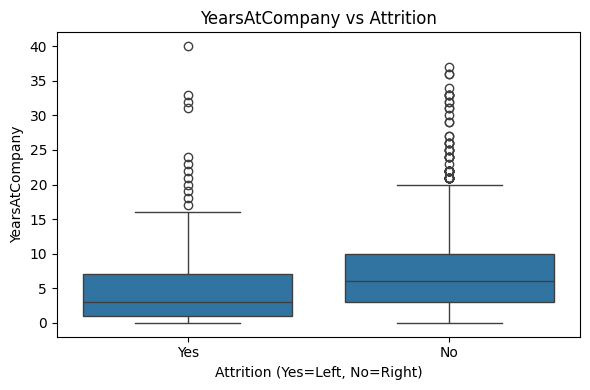

           count      mean  median
Attrition                         
No          1233  7.369019     6.0
Yes          237  5.130802     3.0


In [ ]:
# YearsAtCompany(현 회사 근속연수) vs Attrition(퇴사 여부) 분석용 데이터 만들기
years_at_company_vs_attrition = df[["Attrition", "YearsAtCompany"]].dropna()

# (분석용) Attrition을 0/1로 변환: Yes=1, No=0
years_at_company_vs_attrition["AttritionFlag"] = (
    years_at_company_vs_attrition["Attrition"] == "Yes"
).astype(int)

# (요약표) 퇴사/잔류 그룹별 근속연수: 사람 수 / 평균 / 중앙값
summary = years_at_company_vs_attrition.groupby("Attrition")["YearsAtCompany"].agg(
    count="count", mean="mean", median="median"
)

# (시각화) 퇴사(Yes/No)별 근속연수 분포 비교 (박스플롯)
plt.figure(figsize=(6, 4))
sns.boxplot(data=years_at_company_vs_attrition, x="Attrition", y="YearsAtCompany")
plt.title("YearsAtCompany vs Attrition")
plt.xlabel("Attrition (Yes=Left, No=Right)")
plt.ylabel("YearsAtCompany")
plt.tight_layout()
plt.show()

print(summary)

### **결론**
#### 퇴사자(Yes)는 “대표값(중앙값)” 기준으로 이전 회사 수가 더 적지만, 퇴사자 안에 ‘이전 회사 수가 매우 많은 사람’이 섞여 있어서 평균은 더 높게 나온다.

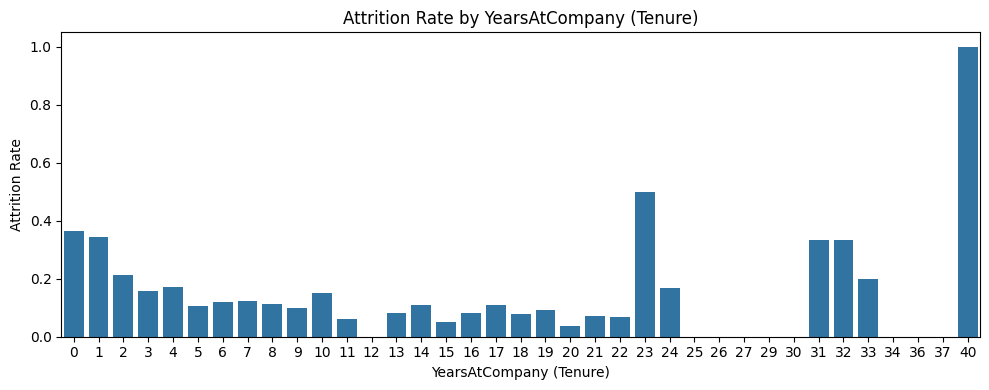

In [ ]:
# 연차(YearsAtCompany)별 퇴사율(Attrition=Yes 비율) 막대그래프

tmp = df[["Attrition", "YearsAtCompany"]].dropna().copy()
tmp["AttritionFlag"] = (tmp["Attrition"] == "Yes").astype(int)

rate_by_year = tmp.groupby("YearsAtCompany")["AttritionFlag"].mean().reset_index()
count_by_year = tmp["YearsAtCompany"].value_counts().rename("count").reset_index()
count_by_year.columns = ["YearsAtCompany", "count"]

result = rate_by_year.merge(count_by_year, on="YearsAtCompany").sort_values("YearsAtCompany")

plt.figure(figsize=(10, 4))
sns.barplot(data=result, x="YearsAtCompany", y="AttritionFlag")
plt.title("Attrition Rate by YearsAtCompany (Tenure)")
plt.xlabel("YearsAtCompany (Tenure)")
plt.ylabel("Attrition Rate")
plt.tight_layout()
plt.show()

### **결론**
#### 하지만 0-1년차 퇴사율이 높은 걸로 보아 단순 Job Hopper가 아닐 수도 있을 것이라고 생각해볼 수 있다

## 4. YearsInCurrentRole(현 직무 수행 기간)별 퇴사율(Attrition Rate) 분석

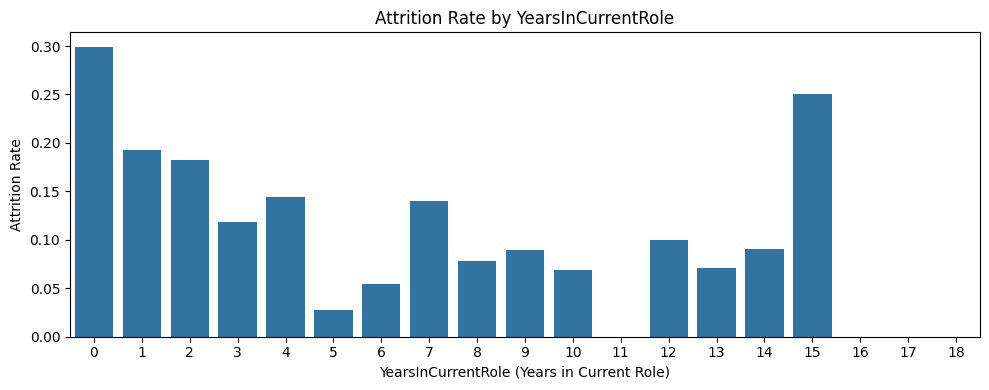

In [ ]:
# YearsInCurrentRole(현 직무 수행 기간)별 퇴사율(Attrition=Yes 비율) 막대그래프

tmp = df[["Attrition", "YearsInCurrentRole"]].dropna().copy()
tmp["AttritionFlag"] = (tmp["Attrition"] == "Yes").astype(int)

rate_by_role_year = tmp.groupby("YearsInCurrentRole")["AttritionFlag"].mean().reset_index()
count_by_role_year = tmp["YearsInCurrentRole"].value_counts().rename("count").reset_index()
count_by_role_year.columns = ["YearsInCurrentRole", "count"]

result = (
    rate_by_role_year
    .merge(count_by_role_year, on="YearsInCurrentRole")
    .sort_values("YearsInCurrentRole")
)

plt.figure(figsize=(10, 4))
sns.barplot(data=result, x="YearsInCurrentRole", y="AttritionFlag")
plt.title("Attrition Rate by YearsInCurrentRole")
plt.xlabel("YearsInCurrentRole (Years in Current Role)")
plt.ylabel("Attrition Rate")
plt.tight_layout()
plt.show()

In [ ]:
# YearsInCurrentRole(현 직무 수행 기간)별 사람 수(count) 세기

role_year_counts = (
    df["YearsInCurrentRole"]
    .dropna()
    .value_counts()
    .sort_index()
)

print(role_year_counts)


YearsInCurrentRole
0     244
1      57
2     372
3     135
4     104
5      36
6      37
7     222
8      89
9      67
10     29
11     22
12     10
13     14
14     11
15      8
16      7
17      4
18      2
Name: count, dtype: int64


### **결론**
#### 0~2년차에서 퇴사율이 높게 나타나는 “초기 이탈 패턴”이 드러난다.

## 5. YearsSinceLastPromotion(마지막 승진 후 경과시간)별 퇴사율(Attrition Rate) 분석

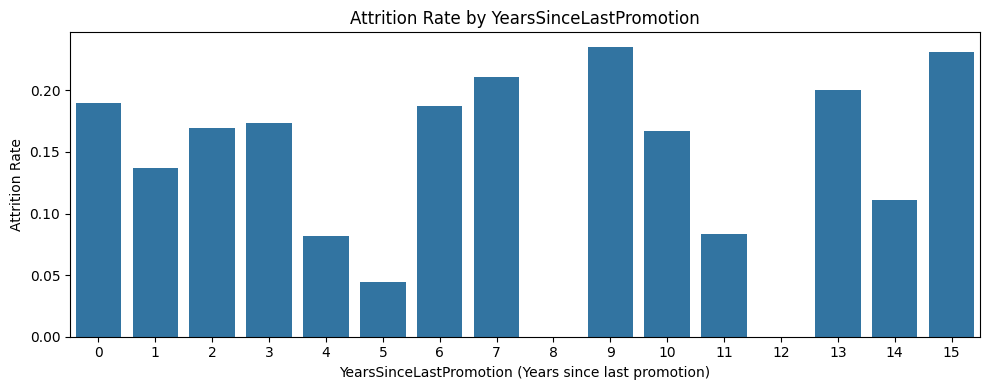

In [ ]:
# YearsSinceLastPromotion(마지막 승진 후 경과시간)별 퇴사율(Attrition=Yes 비율) 막대그래프

tmp = df[["Attrition", "YearsSinceLastPromotion"]].dropna().copy()
tmp["AttritionFlag"] = (tmp["Attrition"] == "Yes").astype(int)

rate_by_promo_gap = tmp.groupby("YearsSinceLastPromotion")["AttritionFlag"].mean().reset_index()
count_by_promo_gap = tmp["YearsSinceLastPromotion"].value_counts().rename("count").reset_index()
count_by_promo_gap.columns = ["YearsSinceLastPromotion", "count"]

result = (
    rate_by_promo_gap
    .merge(count_by_promo_gap, on="YearsSinceLastPromotion")
    .sort_values("YearsSinceLastPromotion")
)

plt.figure(figsize=(10, 4))
sns.barplot(data=result, x="YearsSinceLastPromotion", y="AttritionFlag")
plt.title("Attrition Rate by YearsSinceLastPromotion")
plt.xlabel("YearsSinceLastPromotion (Years since last promotion)")
plt.ylabel("Attrition Rate")
plt.tight_layout()
plt.show()


In [ ]:
# YearsSinceLastPromotion(마지막 승진 후 경과시간) 값별 사람 수(count) + 전체 대비 비율(%)

promo_counts = (
    df["YearsSinceLastPromotion"]
    .dropna()
    .value_counts()
    .sort_index()
)

promo_ratio_pct = (
    df["YearsSinceLastPromotion"]
    .dropna()
    .value_counts(normalize=True)
    .sort_index()
    .mul(100)
)

promo_summary = (
    promo_counts.rename("count")
    .to_frame()
    .join(promo_ratio_pct.rename("ratio_pct"))
)

print(promo_summary)


                         count  ratio_pct
YearsSinceLastPromotion                  
0                          581  39.523810
1                          357  24.285714
2                          159  10.816327
3                           52   3.537415
4                           61   4.149660
5                           45   3.061224
6                           32   2.176871
7                           76   5.170068
8                           18   1.224490
9                           17   1.156463
10                           6   0.408163
11                          24   1.632653
12                          10   0.680272
13                          10   0.680272
14                           9   0.612245
15                          13   0.884354


## **결론**
#### YearsSinceLastPromotion이 길어질수록 일부 구간(예: 6~7년, 9년, 13년, 15년)에서 퇴사율이 상승하는 패턴이 관찰되었습니다.
#### 이는 승진 정체(stagnation)가 일정 기간 누적되면 이탈 위험이 커질 수 있다는 가설을 뒷받침합니다.
#### 다만 9/13/15년처럼 특정 값에서 ‘튀는’ 막대는 표본 수가 적어서 과장될 가능성이 크므로, 각 구간의 사람 수(count)를 함께 확인한 뒤 확정 결론을 내리는 것이 안전합니다.

## 6. YearsWithCurrManager(현 매니저와 근무 기간)별 퇴사율(Attrition Rate) 분석

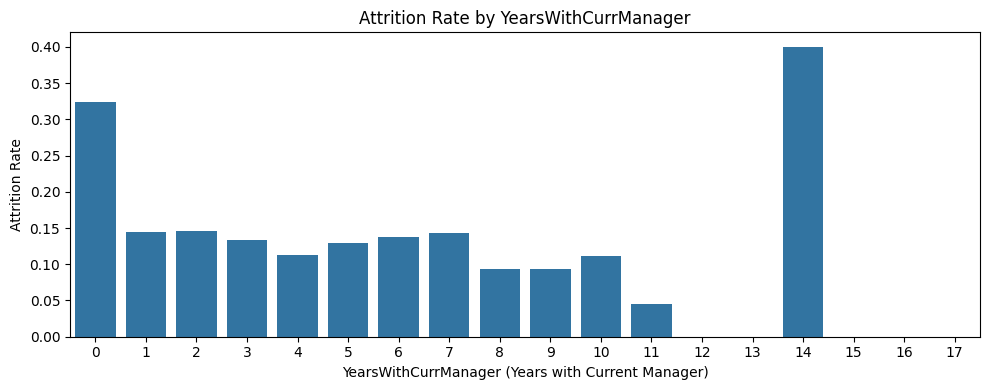

In [ ]:
# YearsWithCurrManager(현 매니저와 근무 기간)별 퇴사율(Attrition=Yes 비율) 막대그래프

tmp = df[["Attrition", "YearsWithCurrManager"]].dropna().copy()
tmp["AttritionFlag"] = (tmp["Attrition"] == "Yes").astype(int)

rate_by_mgr_year = tmp.groupby("YearsWithCurrManager")["AttritionFlag"].mean().reset_index()
count_by_mgr_year = tmp["YearsWithCurrManager"].value_counts().rename("count").reset_index()
count_by_mgr_year.columns = ["YearsWithCurrManager", "count"]

result = (
    rate_by_mgr_year
    .merge(count_by_mgr_year, on="YearsWithCurrManager")
    .sort_values("YearsWithCurrManager")
)

plt.figure(figsize=(10, 4))
sns.barplot(data=result, x="YearsWithCurrManager", y="AttritionFlag")
plt.title("Attrition Rate by YearsWithCurrManager")
plt.xlabel("YearsWithCurrManager (Years with Current Manager)")
plt.ylabel("Attrition Rate")
plt.tight_layout()
plt.show()


In [ ]:
# YearsWithCurrManager(현 매니저와 근무기간) 값별 사람 수(count) + 전체 대비 비율(%)

mgr_counts = (
    df["YearsWithCurrManager"]
    .dropna()
    .value_counts()
    .sort_index()
)

mgr_ratio_pct = (
    df["YearsWithCurrManager"]
    .dropna()
    .value_counts(normalize=True)
    .sort_index()
    .mul(100)
)

mgr_summary = (
    mgr_counts.rename("count")
    .to_frame()
    .join(mgr_ratio_pct.rename("ratio_pct"))
)

print(mgr_summary)

                      count  ratio_pct
YearsWithCurrManager                  
0                       263  17.891156
1                        76   5.170068
2                       344  23.401361
3                       142   9.659864
4                        98   6.666667
5                        31   2.108844
6                        29   1.972789
7                       216  14.693878
8                       107   7.278912
9                        64   4.353741
10                       27   1.836735
11                       22   1.496599
12                       18   1.224490
13                       14   0.952381
14                        5   0.340136
15                        5   0.340136
16                        2   0.136054
17                        7   0.476190


## **결론**
#### YearsWithCurrManager=0 구간에서 퇴사율이 약 32%로 가장 높게 나타났으며, 해당 구간 표본도 263명(17.9%)으로 충분해 ‘초기 구간 이탈’ 패턴이 신뢰도 있게 관찰됩니다.
#### 반면 1~10년 구간은 대체로 10~15% 수준으로 비교적 안정적이며, 매니저와 함께 일한 기간이 쌓일수록 퇴사율이 낮아지는 경향이 시사됩니다.
#### 14년 구간의 높은 퇴사율(약 40%)은 표본이 5명에 불과해 소수 표본으로 인한 변동 가능성이 크므로 확정 결론에서 제외하는 것이 적절합니다.

## 7. TrainingTimesLastYear(전년도 교육 횟수)별 퇴사율(Attrition Rate) 분석

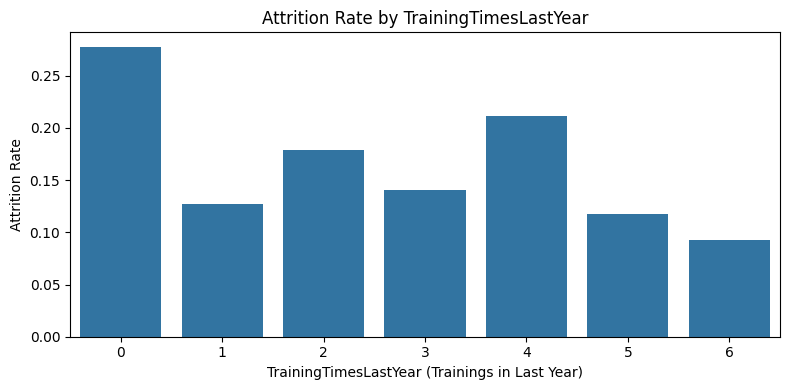

In [ ]:
# TrainingTimesLastYear(전년도 교육 횟수)별 퇴사율(Attrition=Yes 비율) 막대그래프

tmp = df[["Attrition", "TrainingTimesLastYear"]].dropna().copy()
tmp["AttritionFlag"] = (tmp["Attrition"] == "Yes").astype(int)

rate_by_train = tmp.groupby("TrainingTimesLastYear")["AttritionFlag"].mean().reset_index()
count_by_train = tmp["TrainingTimesLastYear"].value_counts().rename("count").reset_index()
count_by_train.columns = ["TrainingTimesLastYear", "count"]

result = (
    rate_by_train
    .merge(count_by_train, on="TrainingTimesLastYear")
    .sort_values("TrainingTimesLastYear")
)

plt.figure(figsize=(8, 4))
sns.barplot(data=result, x="TrainingTimesLastYear", y="AttritionFlag")
plt.title("Attrition Rate by TrainingTimesLastYear")
plt.xlabel("TrainingTimesLastYear (Trainings in Last Year)")
plt.ylabel("Attrition Rate")
plt.tight_layout()
plt.show()


In [ ]:
# TrainingTimesLastYear(전년도 교육 횟수) 값별 사람 수(count) + 전체 대비 비율(%)

train_counts = (
    df["TrainingTimesLastYear"]
    .dropna()
    .value_counts()
    .sort_index()
)

train_ratio_pct = (
    df["TrainingTimesLastYear"]
    .dropna()
    .value_counts(normalize=True)
    .sort_index()
    .mul(100)
)

train_summary = (
    train_counts.rename("count")
    .to_frame()
    .join(train_ratio_pct.rename("ratio_pct"))
)

print(train_summary)


                       count  ratio_pct
TrainingTimesLastYear                  
0                         54   3.673469
1                         71   4.829932
2                        547  37.210884
3                        491  33.401361
4                        123   8.367347
5                        119   8.095238
6                         65   4.421769


## **결론**
#### 교육을 0회 받은 집단에서 퇴사율이 가장 높게 나타났고, 5~6회처럼 교육이 많은 집단은 상대적으로 낮아 보이지만, 교육 횟수만으로 퇴사를 단순 설명하기엔 중간 구간(2~4회)의 변동이 커서 추가 변수와 함께 해석해야 합니다.